<a id="top"></a>

# Exploring JWST Transmission Spectrum Proposals

***

# Learning Goals

By the end of this tutorial, you will:

- Understand how MAST makes its transiting exoplanet time-series data accessible.
- Be able to download MAST-hosted data for specific exoplanets.
- Become familiar with the exo.MAST, astoquery, and MAST APIs.
- Sort MAST data product metadata by attributes (e.g., year, PI).

# Introduction



# Imports

- *jdaviz* to visualize JWST data.

In [1]:
import jdaviz

# Main Contents

## Acquiring data

In [2]:
import requests
import sys
# retrieve our system's Python version for the request. 
version = ".".join(map(str, sys.version_info[:3]))
# create HTTP Header Variables
headers = {"Content-type": "application/x-www-form-urlencoded",
           "Accept": "text/plain",
           "User-agent":"python-requests/"+version}

In [3]:
# use the spectralDB API
import matplotlib.pyplot as plt

# base API url
request_url='https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename=jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()
wav = resolved_object['data']['wavelength']

flux = resolved_object['data']['flux']
flux_err = resolved_object['data']['fluxErr']
plt.plot(wav, flux)
plt.yscale('log')


KeyError: 'data'

In [4]:
resolved_object

{'detail': 'Bad Request: Filename jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits is currently not supported in the JWST Spectra database.'}

In [352]:
resolved_object # is it that the x1dints.fits files aren't on spectralDB yet?
# why can't i plot up the WASP-39 spectra?

{'detail': 'Bad Request: Filename jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits is currently not supported in the JWST Spectra database.'}

In [244]:
resolved_object

{'detail': 'Bad Request: Filename jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048.fits is currently not supported in the JWST Spectra database.'}

In [245]:
# use the spectralDB API

# base API url
request_url='https://mast.stsci.edu/spectra/api/v0.1/retrieve?mission=jwst'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()
wav = resolved_object['data']['wavelength']

flux = resolved_object['data']['flux']
flux_err = resolved_object['data']['fluxErr']




KeyError: 'data'

In [179]:
resolved_object

{'status': -1,
 'message': 'No pixel data found data for file jw01177007001_xx101_00001_miri_x1d.fits',
 'uri': None,
 'filename': 'jw01177007001_xx101_00001_miri_x1d.fits',
 'column_metadata': {'wavelength': {'dtype': 'float',
   'description': 'wavelength values',
   'units': 'um',
   'fitsExt': 'WAVELENGTH'},
  'flux': {'dtype': 'float',
   'description': 'flux values',
   'units': 'Jy',
   'fitsExt': 'FLUX'},
  'fluxErr': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy',
   'fitsExt': 'FLUX_ERROR'},
  'fluxVarPoisson': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_POISSON'},
  'fluxVarRnoise': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_RNOISE'},
  'fluxVarFlat': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_FLAT'},
  'sb': {'dtype': 'float',
   'description': 'surface brightness.  set to zero for point sourc

In [173]:
# use the spectralDB API

# base API url
request_url='https://mast.stsci.edu/spectra/api/v0.1/retrieve/derived?uri=mast:JWST/product/jw01125-o006_t001_nirspec_g140h-f100lp_x1d.fits'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()
resolved_object

{'status': -1,
 'message': 'No derived data found data for file jw01177009001_xx101_00001_miri_x1d.fits',
 'uri': 'mast:JWST/product/jw01177009001_xx101_00001_miri_x1d.fits',
 'filename': 'jw01177009001_xx101_00001_miri_x1d.fits',
 'data': []}

In [56]:
resolved_object['column_metadata']

KeyError: 'column_metadata'

In [ ]:
# get the FITS file with astroquery

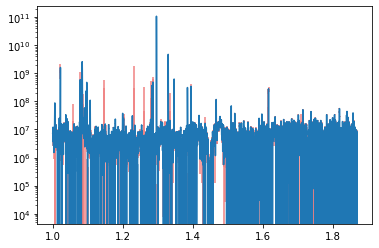

In [34]:
import matplotlib.pyplot as plt
plt.errorbar(wav, flux, yerr=flux_err, ecolor='lightcoral')
plt.yscale('log')

In [5]:
# use the spectralDB API

# base API url
import requests
request_url='https://mast.stsci.edu/spectra/api/v0.1/search/columns/'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()



In [6]:
for l in resolved_object['parameters']:
    print(l['parameter'])

observationID
qualityFlag
fileName
caomDataRelease
productType
objectType
redshift
exomastID
targetName
targetRA
targetDec
primaryHeader
instrument
detector
filter
band
expCount
expType
proposerName
proposerRA
proposerDec
template
fileType
calVer
calVcs
spdVer
prdVer
obsID
visitID
program
obsNum
visitNum
visitGrp
scienceHeader
numSpectra
mission
snrContinuum
outliers
similarityClassifier
spectralType
derSnr
spaxelIdx
productType
flux
err
fluxErr
fluxVarPoisson
fluxVarRnoise
fluxVarFlat
quality
wavelength
snr
dispersion
x
y
sb
sbErr
sbVarPoisson
sbVarRnoise
sbVarFlat
bkg
bkgErr
bkgVarPoisson
bkgVarRnoise
bkgVarFlat
npixels
sci
wmap
wht
con
varPoisson
varRnoise
varFlat
weight
ninput
spaxelIdx


In [184]:
# submit the request
url = 'https://mast.stsci.edu/spectra/api/v0.1/search'
conditions = {'program': 2512}
r = requests.post(url, json={'conditions': conditions, 'columns': ['err', 'quality', 'targetName']})

# get the response
data = r.json()
data

{'detail': 'Bad Request: Cannot execute query.  Check input syntax and parameter names.'}

# Start here

In [1]:
import requests
import sys
# retrieve our system's Python version for the request. 
version = ".".join(map(str, sys.version_info[:3]))
# create HTTP Header Variables
headers = {"Content-type": "application/x-www-form-urlencoded",
           "Accept": "text/plain",
           "User-agent":"python-requests/"+version}

In [7]:
# submit the request. why doesn't WASP-39 work?
url = 'https://mast.stsci.edu/spectra/api/v0.1/search'
conditions = {'flux.gt': '0','targetName': 'JUPITER'}
r = requests.post(url, json={'conditions': conditions,
                             'columns': ['err', 'quality', 'targetName']})

# get the response
data = r.json()
data

{'status': 1,
 'query': "select d.fileName, s.x, s.y, s.wavelength, s.flux, s.err, s.quality, d.targetName from dbo.DataProduct as d join dbo.SpectralPixel as s on d.DataProductID=s.DataProductID where d.productType = 'x1d' and s.flux > 0 and d.targetName = 'JUPITER' ;",
 'results': [{'fileName': 'jw01022-o023_t001_miri_ch1-short_x1d.fits',
   'x': 0,
   'y': None,
   'wavelength': 4.90050009539118,
   'flux': 16.360596299936496,
   'err': None,
   'quality': 0,
   'targetName': 'JUPITER'},
  {'fileName': 'jw01022-o023_t001_miri_ch1-short_x1d.fits',
   'x': 1,
   'y': None,
   'wavelength': 4.901500095438678,
   'flux': 23.585727582039453,
   'err': None,
   'quality': 0,
   'targetName': 'JUPITER'},
  {'fileName': 'jw01022-o023_t001_miri_ch1-short_x1d.fits',
   'x': 2,
   'y': None,
   'wavelength': 4.902500095486175,
   'flux': 31.408788891404765,
   'err': None,
   'quality': 0,
   'targetName': 'JUPITER'},
  {'fileName': 'jw01022-o023_t001_miri_ch1-short_x1d.fits',
   'x': 3,
   'y

In [35]:
import numpy as np

In [90]:
# submit the request
url = 'https://mast.stsci.edu/spectra/api/v0.1/search'
conditions = {'flux.gt': '0','targetRA':'200.326,210.326'}
r = requests.post(url, json={'conditions': conditions,
                             'columns': ['err', 'quality', 'targetName']})

# get the response
data = r.json()
data

{'status': 1,
 'query': "select d.fileName, s.x, s.y, s.wavelength, s.flux, s.err, s.quality, d.targetName, d.targetRA from dbo.DataProduct as d join dbo.SpectralPixel as s on d.DataProductID=s.DataProductID where d.productType = 'x1d' and s.flux > 0 and d.targetRA between 200.326 and 210.326 ;",
 'results': []}

In [ ]:
names = []
for d in data['results']:
    names += [d['targetName']]
    
print(np.unique(names))

In [10]:
import numpy as np

In [11]:
targetname = 'JUPITER'

targetfiles = []

for d in data['results']:
    if d['targetName'] == targetname:
        targetfiles += [d['fileName']]


In [12]:
np.unique(targetfiles)

array(['jw01022-o012_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o013_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o014_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o015_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o016_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o017_t001_miri_ch1-short_x1d.fits',
       'jw01022-o017_t001_miri_ch4-short_x1d.fits',
       'jw01022-o018_t001_miri_ch4-short_x1d.fits',
       'jw01022-o020_t001_miri_ch1-short_x1d.fits',
       'jw01022-o020_t001_miri_ch4-short_x1d.fits',
       'jw01022-o021_t001_miri_ch3-short_x1d.fits',
       'jw01022-o021_t001_miri_ch4-short_x1d.fits',
       'jw01022-o022_t001_miri_ch1-short_x1d.fits',
       'jw01022-o022_t001_miri_ch2-short_x1d.fits',
       'jw01022-o022_t001_miri_ch3-short_x1d.fits',
       'jw01022-o022_t001_miri_ch4-short_x1d.fits',
       'jw01022-o023_t001_miri_ch1-short_x1d.fits',
       'jw01022-o023_t001_miri_ch2-short_x1d.fits',
       'jw01022-o023_t001_miri_ch3

In [13]:
targetfile = targetfiles[0]
# targetfile = 'jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048_s2d.fits'

In [14]:
request_url=f'https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename={targetfile}'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()

print(resolved_object['message'])


wav = resolved_object['data']['wavelength']

flux = resolved_object['data']['flux']
flux_err = resolved_object['data']['fluxErr']


Successfully found data for jw01022-o023_t001_miri_ch1-short_x1d.fits


In [15]:
resolved_object

{'status': 1,
 'message': 'Successfully found data for jw01022-o023_t001_miri_ch1-short_x1d.fits',
 'uri': None,
 'filename': 'jw01022-o023_t001_miri_ch1-short_x1d.fits',
 'column_metadata': {'wavelength': {'dtype': 'float',
   'description': 'wavelength values',
   'units': 'um',
   'fitsExt': 'WAVELENGTH'},
  'flux': {'dtype': 'float',
   'description': 'flux values',
   'units': 'Jy',
   'fitsExt': 'FLUX'},
  'fluxErr': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy',
   'fitsExt': 'FLUX_ERROR'},
  'fluxVarPoisson': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_POISSON'},
  'fluxVarRnoise': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_RNOISE'},
  'fluxVarFlat': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_FLAT'},
  'sb': {'dtype': 'float',
   'description': 'surface brightness.  set to zero for point sources 

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Flux (Jy)')

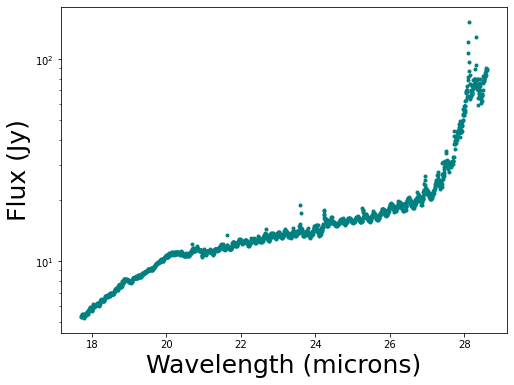

In [32]:
plt.figure(figsize=(8,6))
plt.errorbar(wav, flux, yerr=flux_err, color='teal', fmt='.')

plt.yscale('log')

plt.xlabel('Wavelength (microns)', fontsize=25)

plt.ylabel('Flux (Jy)', fontsize=25)

In [25]:
len(np.unique(targetfiles))

31

In [ ]:
plt.plot(wav, flux/
        )

Successfully found data for jw01022-o012_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o013_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o014_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o015_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o016_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o017_t001_miri_ch1-short_x1d.fits
Successfully found data for jw01022-o017_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o018_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o020_t001_miri_ch1-short_x1d.fits
Successfully found data for jw01022-o020_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o021_t001_miri_ch3-short_x1d.fits
Successfully found data for jw01022-o021_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o022_t001_miri_ch1-short_x1d.fits
Successfully found data for jw01022-o022_t001_miri_ch2-short

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_23770/2895073219.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


Successfully found data for jw01022-o024_t001_miri_ch3-short_x1d.fits
Successfully found data for jw01022-o024_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o025_t001_miri_ch3-short_x1d.fits
Successfully found data for jw01022-o025_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o026_t001_miri_ch3-short_x1d.fits
Successfully found data for jw01022-o026_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01246-o004_t002_miri_ch1-longshortmedium-_x1d.fits
Successfully found data for jw01246-o004_t002_miri_ch2-longshortmedium-_x1d.fits
Successfully found data for jw01246-o004_t002_miri_ch3-longshortmedium-_x1d.fits
Successfully found data for jw01246-o004_t002_miri_ch4-longshortmedium-_x1d.fits


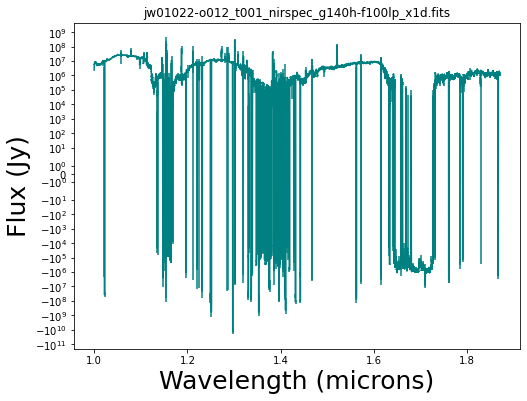

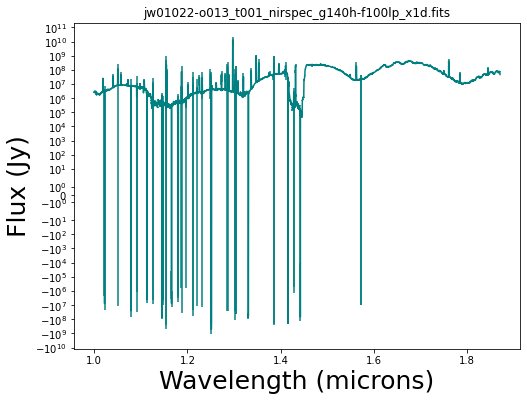

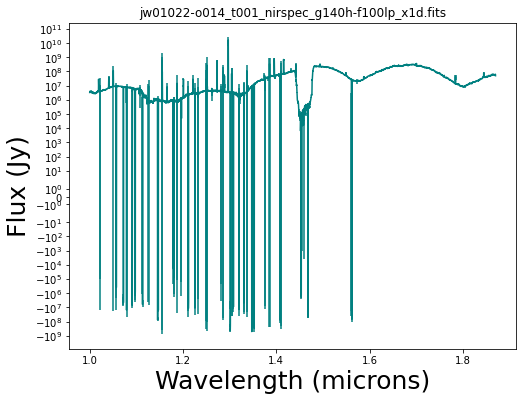

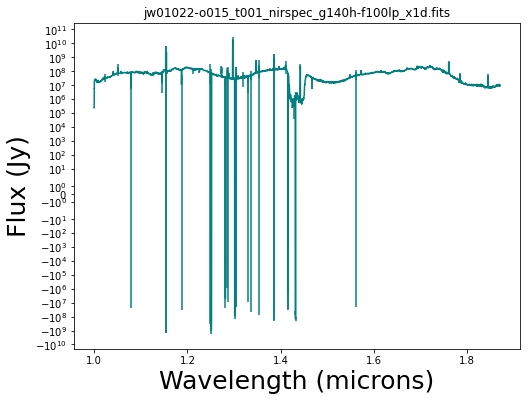

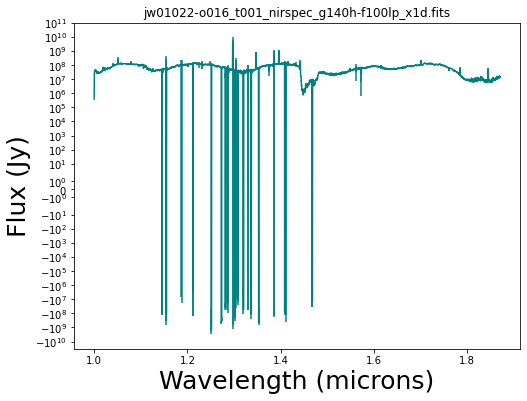

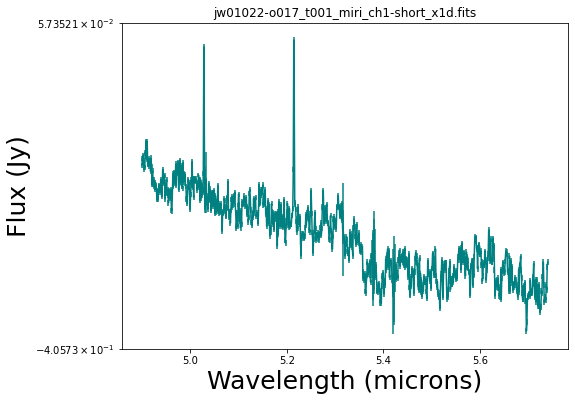

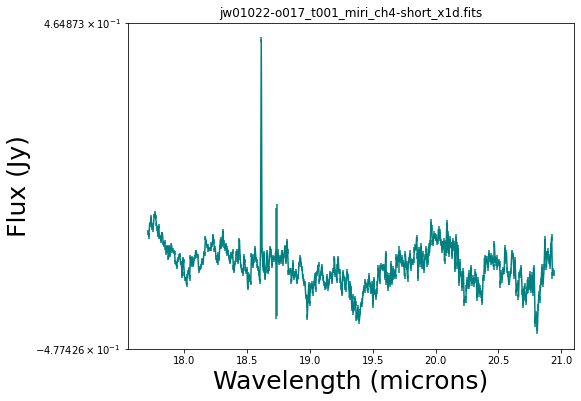

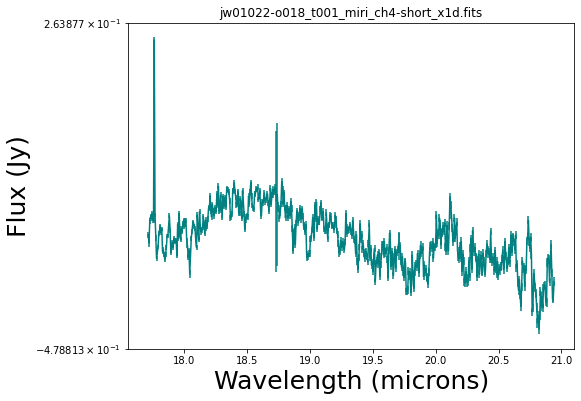

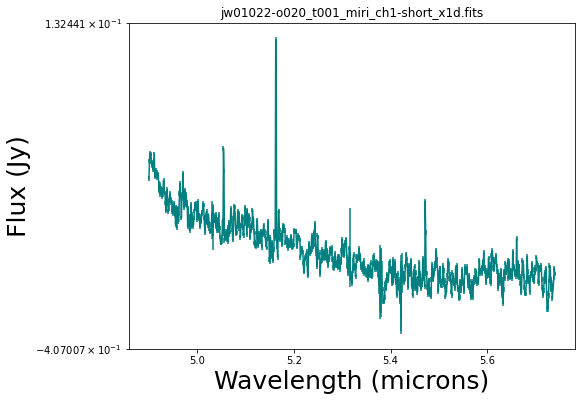

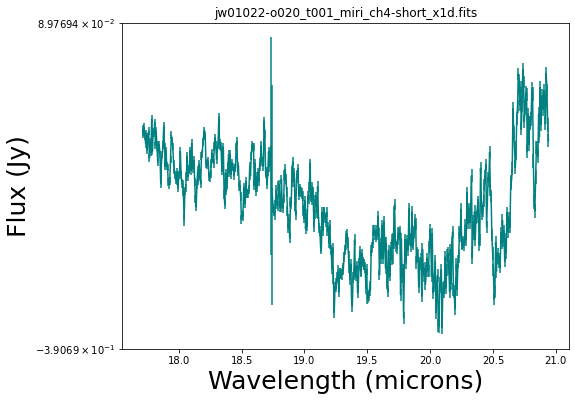

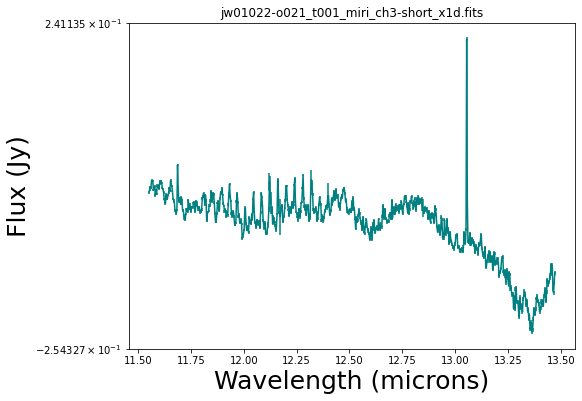

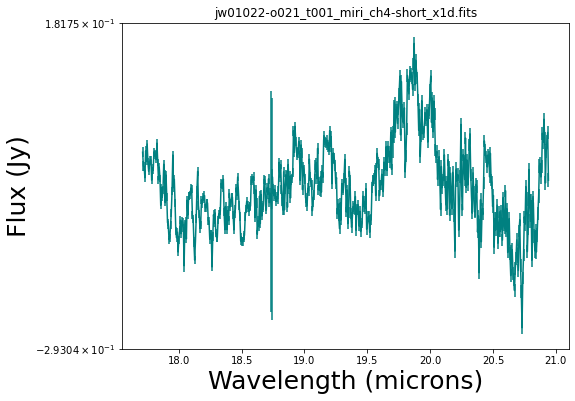

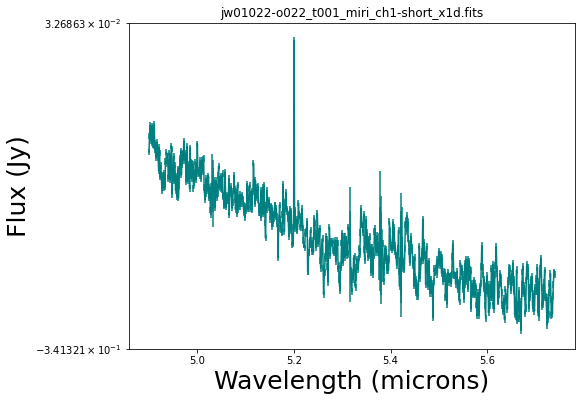

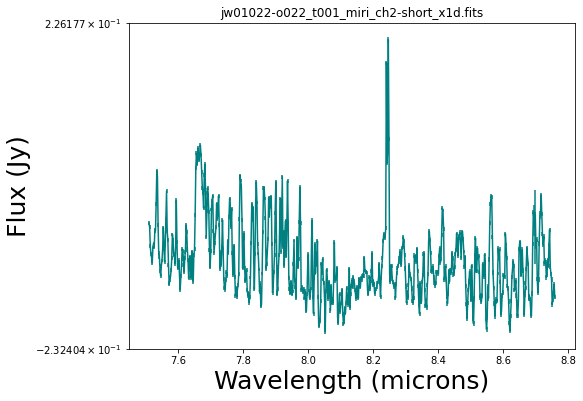

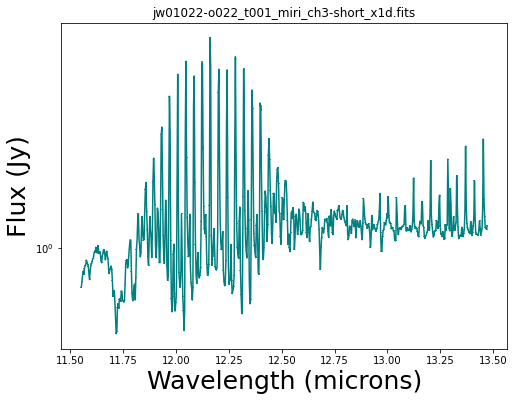

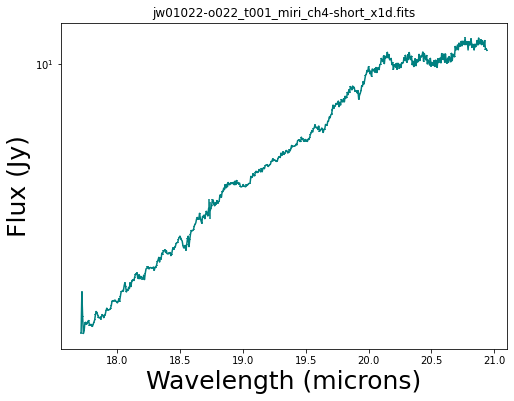

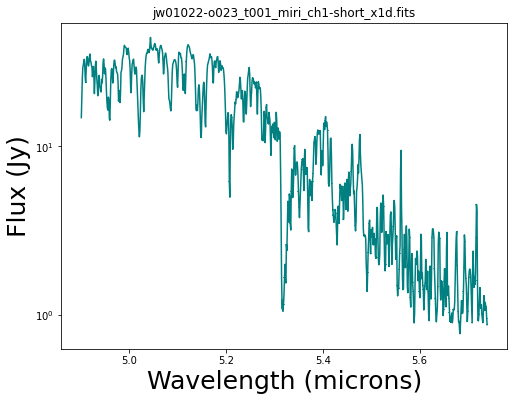

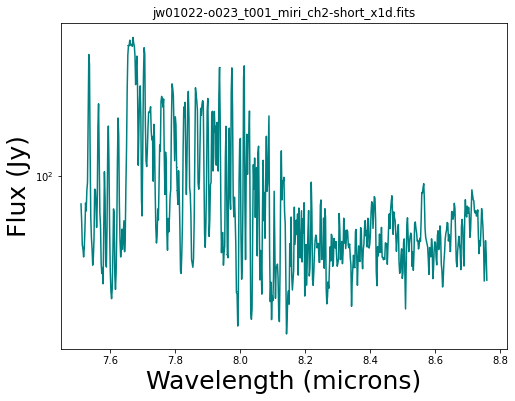

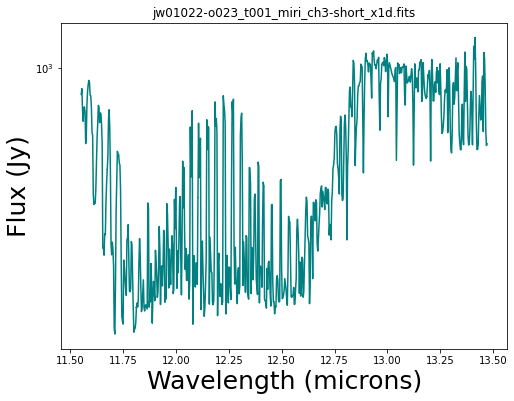

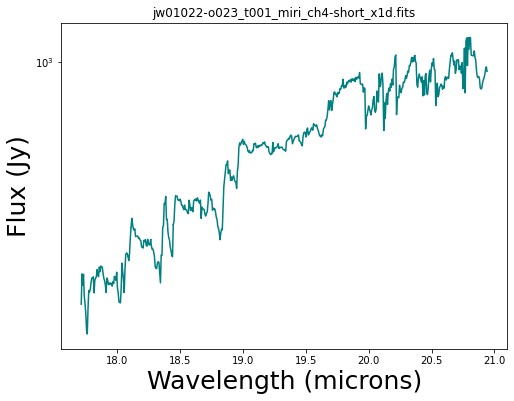

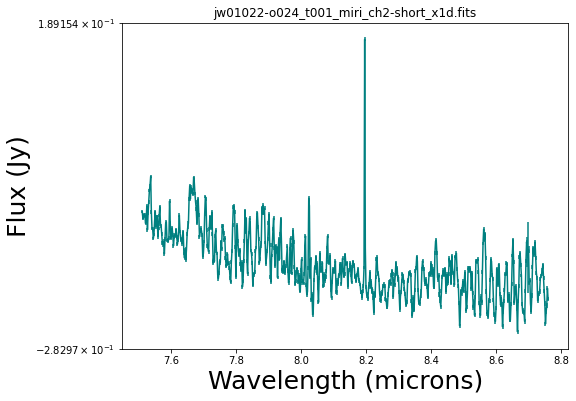

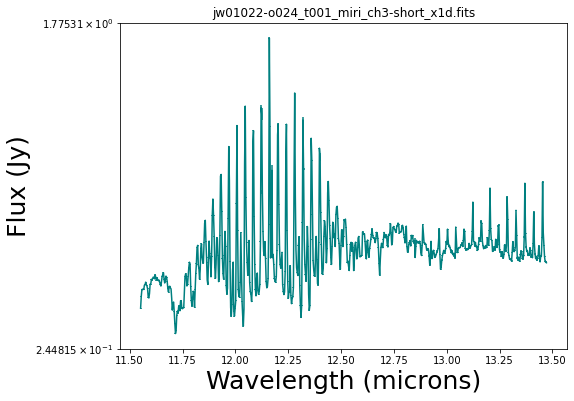

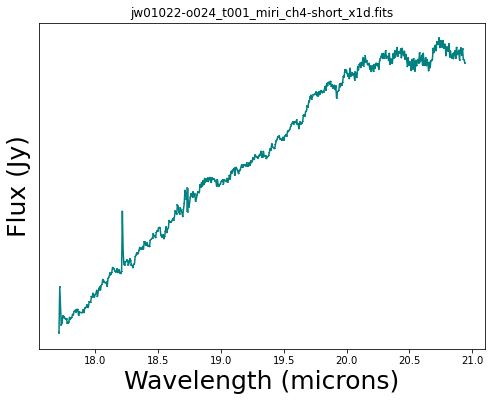

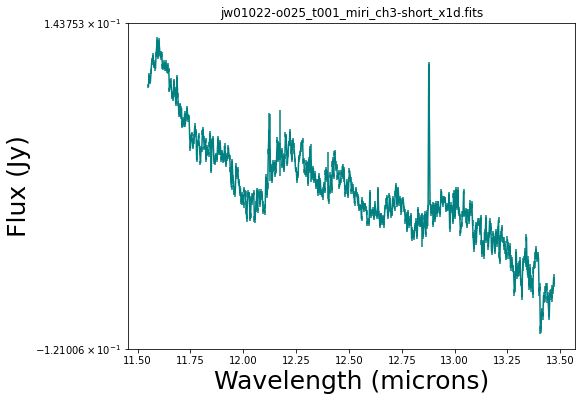

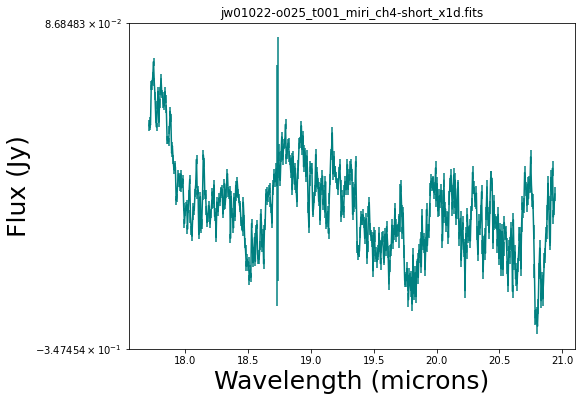

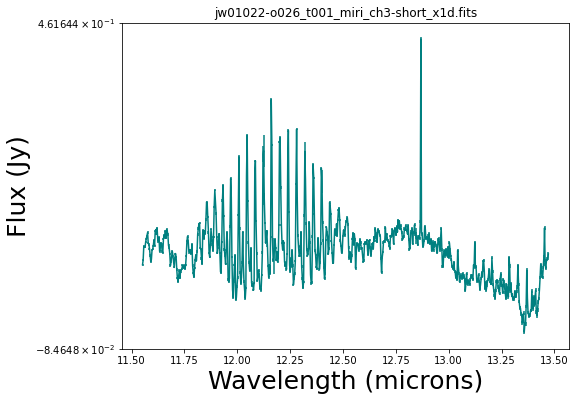

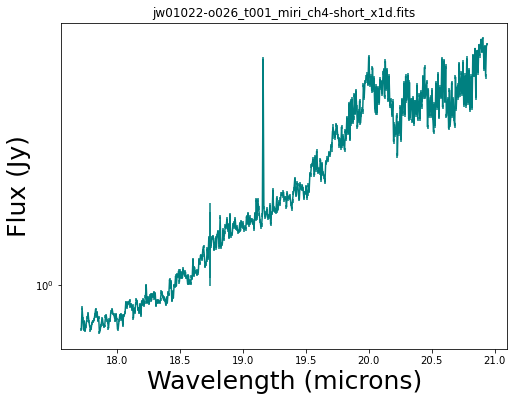

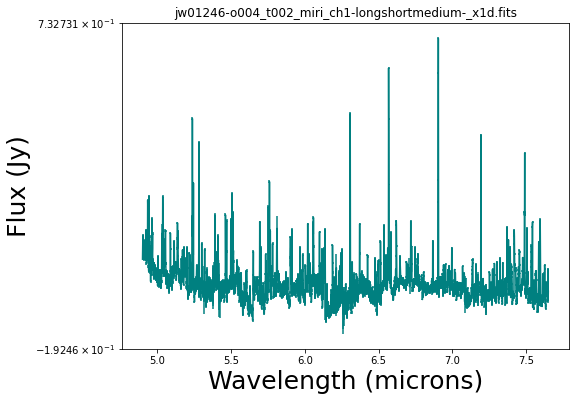

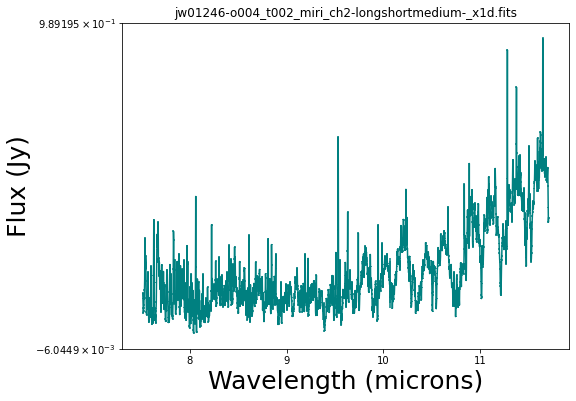

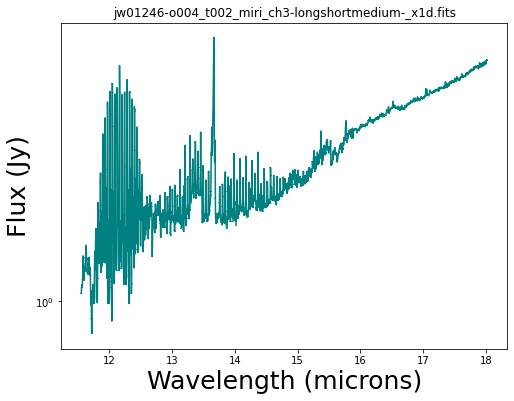

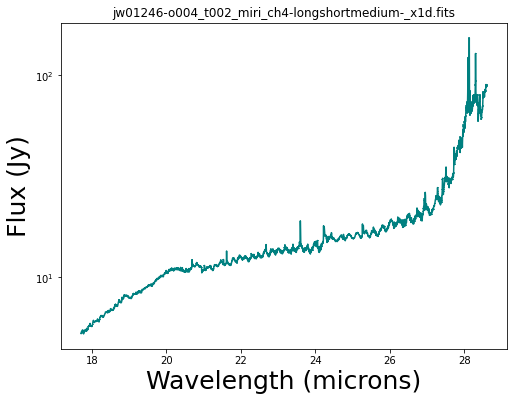

In [36]:
for targetfile in np.unique(targetfiles):

    request_url=f'https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename={targetfile}'    

    # perform the HTTP request
    resp = requests.get(request_url, headers=headers)

    resolved_object = resp.json()

    print(resolved_object['message'])


    wav = resolved_object['data']['wavelength']

    flux = resolved_object['data']['flux']
    flux_err = resolved_object['data']['fluxErr']
    plt.figure(figsize=(8,6))
    plt.errorbar(wav, flux, yerr=flux_err, color='teal')
    plt.title(targetfile)

    plt.yscale('symlog')

    plt.xlabel('Wavelength (microns)', fontsize=25)

    plt.ylabel('Flux (Jy)', fontsize=25)


In [ ]:
jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048

In [16]:
print(resolved_object['column_metadata']['wavelength']['units'])

um


In [19]:
print(resolved_object['column_metadata']['flux']['units'])

Jy


# End here

In [68]:
obs_table = Observations.query_object('WASP-33 b')


In [70]:
obs_table[obs_table['instrument_name']=='JWST']

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str12,str13,str4,str9,str16,str20,str32,str78,float64,float64,str10,str28,int64,float64,float64,float64,float64,float64,str113,float64,str21,str6,int64,str4419,str120,str131,str6,bool,float64,str8,float64


In [80]:
np.unique(obs_table['project'])

AIS
HAP
HLA
HST
--
PS1
TESS


In [8]:
target_name='HD 80606 b'
target_resolver='NED'
width=u.Quantity(5, u.deg)
height=u.Quantity(5, u.deg)
r=Jwst.query_target(target_name=target_name, width=width, height=height, async_job=True)
r

NameError: name 'u' is not defined

In [17]:
from jdaviz import *

In [18]:
product_list=Jwst.get_product_list(observation_id='jw01125-o006_t001_nirspec_g140h-f100lp_x1d.fits')
for row in product_list:
    print("filename: %s" % (row['filename']))

NameError: name 'Jwst' is not defined

In [26]:
# use astoquery?
from astroquery.mast import Observations

In [52]:
# Observations.query_criteria(obs_id='216453')

Observations.download_products('1125851',
                               productType=["SCIENCE", "PREVIEW"],
                               extension="fits")

Local Path,Status,Message,URL
str65,str8,object,object
./mastDownload/K2/ktwo212635813-c06_lc/ktwo212635813-c06_llc.fits,COMPLETE,None,None


In [25]:
single_obs = Observations.get_product_list("jw01125-o006_t001_nirspec_g140h-f100lp_x1d.fits")

RemoteServiceError: Error converting data type varchar to bigint.

todo: how to get BD+60 1753 (jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048)? the s_2d file? or even show that it exists? i can download this data calibration thing but I don't know why I'm not able to find it using exo.mast or other stuff. well, it's not an exoplanet, sure. but why doesn't spectralDB find it?

## Using `jdaviz`

In [ ]:
# can jdaviz actually see it?

In [35]:
import astropy.units as u


In [36]:
# Suppress warnings
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [342]:
from jdaviz import Specviz
specviz = Specviz()

In [344]:
specviz.app


Application(config='specviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'dat…

In [294]:
import astropy.io.fits as pyfits

In [313]:


new_fits = pyfits.getdata('/Users/arjunsavel/Downloads/MAST_2022-07-31T1835/JWST/jw02589-o002_t001_niriss_f277w-gr700xd-substrip256/jw02589-o002_t001_niriss_f277w-gr700xd-substrip256_x1dints.fits'
           
           
           
           )


new_header =  pyfits.getheader('/Users/arjunsavel/Downloads/MAST_2022-07-31T1835/JWST/jw02589-o002_t001_niriss_f277w-gr700xd-substrip256/jw02589-o002_t001_niriss_f277w-gr700xd-substrip256_x1dints.fits')



In [314]:
old_fits =  pyfits.getdata('/Users/arjunsavel/.astropy/cache/download/url/b98c9bc8cf7bf9595f40df56f223d1bd/contents')

In [315]:
old_header =  pyfits.getheader('/Users/arjunsavel/.astropy/cache/download/url/b98c9bc8cf7bf9595f40df56f223d1bd/contents')




In [316]:
old_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4514496847.55 / 1st row - Number of seconds since Nov 17 1858  
RA      =            1.485465  / 1st row - Right ascension of telescope boresigh
DEC     =            14.972768 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '02:32:03.00'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                52251 / MJD of observation                             
MJDLIST = '52251   '        

In [317]:
new_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-07-20T21:03:12.624' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02589-o002_t001_niriss_f277w-gr700xd-substrip256_x1dints.fits' / Na
SDP_VER = '2022_2a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-055'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.5.3   '        

In [305]:
new_fits

FITS_rec([([ 35,  65,  83,  68,  70,  32,  49,  46,  48,  46,  48,  10,  35,  65,  83,  68,  70,  95,  83,  84,  65,  78,  68,  65,  82,  68,  32,  49,  46,  53,  46,  48,  10,  37,  89,  65,  77,  76,  32,  49,  46,  49,  10,  37,  84,  65,  71,  32,  33,  32, 116,  97, 103,  58, 115, 116, 115,  99, 105,  46, 101, 100, 117,  58,  97, 115, 100, 102,  47,  10,  45,  45,  45,  32,  33,  99, 111, 114, 101,  47,  97, 115, 100, 102,  45,  49,  46,  49,  46,  48,  10,  97, 115, 100, 102,  95, 108, 105,  98, 114,  97, 114, 121,  58,  32,  33,  99, 111, 114, 101,  47, 115, 111, 102, 116, 119,  97, 114, 101,  45,  49,  46,  48,  46,  48,  32, 123,  97, 117, 116, 104, 111, 114,  58,  32,  84, 104, 101,  32,  65,  83,  68,  70,  32,  68, 101, 118, 101, 108, 111, 112, 101, 114, 115,  44,  32, 104, 111, 109, 101, 112,  97, 103, 101,  58,  32,  39, 104, 116, 116, 112,  58,  47,  47, 103, 105, 116, 104, 117,  98,  46,  99, 111, 109,  47,  97, 115, 100, 102,  45, 102, 111, 114, 109,  97, 116,  47,  97

In [334]:
cal_file = '/Users/arjunsavel/Downloads/MAST_2022-07-31T2309/JWST/jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048/jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048_s2d.fits'



In [336]:
from astropy.utils.data import download_file
# fn = download_file('https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/0751/spec-0751-52251-0160.fits', cache=True)
specviz.load_spectrum(cal_file,
                      "myfile")

/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/jdaviz/app.py:1273: UserWarning: No data item with id '7ad1cb9a-6b47-4019-a1bc-132943f48a41' found in viewer 'specviz-0'.
  warnings.warn(f"No data item with id '{data_id}' found in "
/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/jdaviz/app.py:1273: UserWarning: No data item with id 'f09af519-f852-4d0f-8b85-8cc71c07b895' found in viewer 'specviz-0'.
  warnings.warn(f"No data item with id '{data_id}' found in "


In [337]:
from jdaviz import Specviz2d
specviz2d = Specviz2d()

In [341]:
specviz2d.app


Application(config='specviz2d', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'd…

In [ ]:
#jdaviz bug on m1 chip?

In [339]:
fn = download_file('https://stsci.box.com/shared/static/exnkul627fcuhy5akf2gswytud5tazmw.fits', cache=True)


In [340]:
specviz2d.load_data(fn)


/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/asdf/asdf.py:330: AsdfWarning: File 'file:///Users/arjunsavel/.astropy/cache/download/url/0020ed59db5437477364878f8b0aea32/contents' was created with extension class 'jwst.transforms.jwextension.JWSTExtension' (from package jwst==0.16.1.dev38+g0f51a321), which is not currently installed
  warnings.warn(msg, AsdfWarning)


# Exercises
- Do for a different proposal?
- Do for emission spectra?
- Do for phase curves?

# Additional Resources
- Primers on exoplanet spectral data types ([Deming, Louie, and Sheets 2018](https://iopscience.iop.org/article/10.1088/1538-3873/aae5c5/meta?casa_token=253HfRr4kyYAAAAA:C0CtfuH4Um2l4Kul5O3tajY2TolSVuXi8fGj48bzSlmJIuvPmeYkb1yXtd10MOjwPqJokDpNvv4)) 
- JWST primer

# About this Notebook

**Author**: Arjun B. Savel (asavel@umd.edu).

**Last updated**: 2022-06-12

# Citations
If you use `jdaviz` for published research, please cite the authors. Follow these links for more information about citing `jdaviz`:

* [Citing `jdaviz`](https://www.astropy.org/acknowledging.html)


[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>
